### Q.5 MNIST dataset PCA

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.datasets import fetch_openml


In [127]:
df = pd.read_csv('mnist_train.csv')
#test = pd.read_csv('mnist_test.csv')
#df = train.merge(test, how='outer')


In [128]:
df_code = df[df['label'] == 3][:200]
X = df_code.iloc[:, 1:]
y = df_code.loc[:,'label']


In [129]:
mean = X.mean(axis=0)
#std = X.std(axis=0)
#print(std)
norm = (X-mean)
covMat = np.cov(norm.T, rowvar = False)
covMat

array([[ 3055.92522108,  -246.89839236, -1050.72422209, ...,
        -1212.32903347,   255.85540617,  -608.07332951],
       [ -246.89839236,  2117.92649258,  -123.64050306, ...,
          677.71630786,   794.40040052,   553.73930206],
       [-1050.72422209,  -123.64050306,  4314.37814619, ...,
         -434.31039926,   447.76155113,   622.90179726],
       ...,
       [-1212.32903347,   677.71630786,  -434.31039926, ...,
         3216.56445451,   219.38476449,   -20.50050448],
       [  255.85540617,   794.40040052,   447.76155113, ...,
          219.38476449,  2659.8461055 ,   372.34673294],
       [ -608.07332951,   553.73930206,   622.90179726, ...,
          -20.50050448,   372.34673294,  2830.63068818]])

In [135]:
eigenval, eigenvec = np.linalg.eig(covMat)
idx = np.argsort(eigenval)[::-1]
eigenvec = eigenvec[:,idx]
eigenval = eigenval[idx]


array([[-0.05582879,  0.14346777,  0.07109046, ..., -0.01190425,
         0.0209173 , -0.07071068],
       [-0.01741642, -0.0436346 , -0.01248158, ..., -0.14843109,
         0.19863907, -0.07071068],
       [ 0.1293243 , -0.05317819,  0.09022721, ...,  0.04898818,
        -0.04439276, -0.07071068],
       ...,
       [-0.02963033, -0.10515296, -0.1207402 , ...,  0.00177247,
         0.0491611 , -0.07071068],
       [ 0.04194823,  0.03337269,  0.00671661, ...,  0.10896019,
        -0.08617829, -0.07071068],
       [ 0.051498  , -0.04917788,  0.00593851, ..., -0.00560299,
        -0.04362784, -0.07071068]])

Taking the top three basis vectors we get:

In [131]:
eigenvec, eigenval = eigenvec[:,:3], eigenval[3]

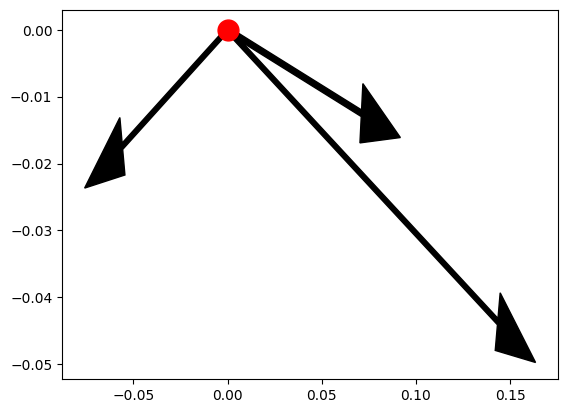

In [132]:
#plt.scatter(X[:,0], X[:,1], color='b')
plt.plot(mean[0], mean[1], marker='o', color='red', markersize=15)
for v in eigenvec.T:

    plt.arrow(mean[0], mean[1], v[0], v[1],  head_width=0.009, head_length=0.021, fc='k', ec='k')
plt.show()

In [133]:
import matplotlib.pyplot as plt

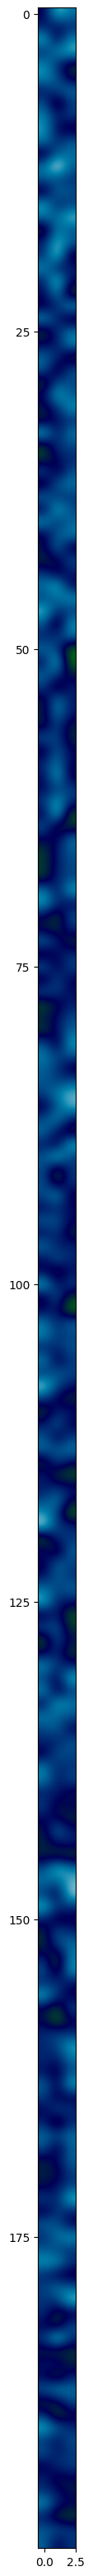

In [134]:
plt.figure(figsize=(20,40))
plt.imshow(eigenvec, interpolation = 'bicubic', alpha=1, cmap='ocean')


#### Q3 Post Grad students

In [115]:
import pandas as pd

# Create a dictionary with the data for each student
data = {
    'ID': [1, 2, 3, 4, 5],
    'Age': [25, 22, 30, 28, 25],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Major': ['Computer Science', 'Biology', 'Psychology', 'Other', 'Computer Science'],
    'GPA': [3.7, 3.5, 3.9, 3.2, 3.8],
    'Research experience': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Accepted into postgraduate program': ['Yes', 'No', 'Yes', 'No', 'Yes']
}

# Create the dataframe
df = pd.DataFrame(data)

# View the dataframe
df

,ID,Age,Gender,Major,GPA,Research experience,Accepted into postgraduate program
0,1,25,Male,Computer Science,3.7,Yes,Yes
1,2,22,Female,Biology,3.5,No,No
2,3,30,Male,Psychology,3.9,Yes,Yes
3,4,28,Female,Other,3.2,No,No
4,5,25,Male,Computer Science,3.8,Yes,Yes


In [116]:
X = df.iloc[:, 1:6]
y = df.iloc[:, 6]

In [117]:
X_gender = pd.get_dummies(X['Gender'], sparse=True, drop_first = True)
X_major = pd.get_dummies(X['Major'], sparse=True, drop_first = True)
X_research = pd.get_dummies(X['Research experience'], sparse=True, drop_first = True)
X = pd.concat([X, X_gender, X_major, X_research], axis = 1)
X.drop(['Gender', 'Major', 'Research experience'], axis=1, inplace=True)
X

,Age,GPA,Male,Computer Science,Other,Psychology,Yes
0,25,3.7,1,1,0,0,1
1,22,3.5,0,0,0,0,0
2,30,3.9,1,0,0,1,1
3,28,3.2,0,0,1,0,0
4,25,3.8,1,1,0,0,1


In [118]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [119]:
model = AdaBoostClassifier(n_estimators=5, algorithm = 'SAMME.R')
model.fit(X, y)


C:\Users\KIIT\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


AdaBoostClassifier(n_estimators=5)

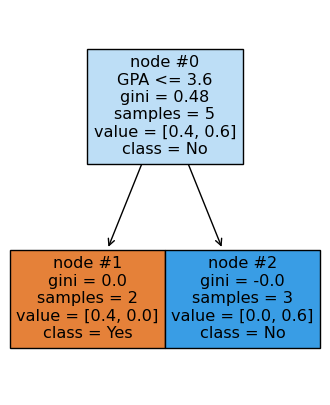

Decision Tree 1


In [120]:
from sklearn.tree import  plot_tree
features_name = X.columns
target_name = y
def plot_decision_trees(clf, iteration, feature_name, target_name):
    plt.figure(figsize=[4.0,5.0])
    plot_tree(clf, filled=True, feature_names=feature_name, class_names=target_name, node_ids=True)
    plt.show()
    print("Decision Tree {}".format(iteration + 1))
for i in range(len(model.estimators_)):
    plot_decision_trees(model.estimators_[i], i, features_name, target_name)